# NLP Practice

In [10]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.display import display, HTML

# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
plt.rcParams["figure.figsize"] = (12, 6)


In [11]:
def load_single_set(select=None):
    sk_data1_folder = "/Users/nacosta/Documents/research_topic/sk_data1"
    sk_data1_files  = glob.glob(sk_data1_folder+"/*.csv")
    if select == 1:
        return(pd.read_csv(sk_data1_files[0]))
    elif select == 2:
        return(pd.read_csv(sk_data1_files[3]))
    elif select == 3:
        return(pd.read_csv(sk_data1_files[1]))
    elif select == 4:
        return(pd.read_csv(sk_data1_files[2]))
    else:
        return select
def load_data():
    sk_data1_folder = "/Users/nacosta/Documents/research_topic/sk_data1"
    sk_data1_files  = glob.glob(sk_data1_folder+"/*.csv")
    least_vic_df = pd.read_csv(sk_data1_files[0])
    mid2_vic_df = pd.read_csv(sk_data1_files[1])
    highest_vic_df = pd.read_csv(sk_data1_files[2])
    mid1_vic_df = pd.read_csv(sk_data1_files[3])
    full_data = concat_data(least_vic_df, mid2_vic_df, highest_vic_df, mid1_vic_df)
    return full_data
    
def concat_data(least_vic_df, mid2_vic_df, highest_vic_df, mid1_vic_df):
    all_data=[least_vic_df, mid2_vic_df, highest_vic_df, mid1_vic_df]
    return pd.concat(all_data)

def plot_format(df):
    df['Years active'] = pd.to_numeric(df['Years active'], errors='coerce')
    df['Proven victims'] = pd.to_numeric(df['Proven victims'], errors='coerce')
    df['Possible victims'] = pd.to_numeric(df['Possible victims'], errors='coerce')
    return df

def quick_plots(df):
    df = plot_format(df)
    # plt.figure(figsize=(12, 6))

    # Example 1: Countplot
    sns.countplot(data=df, x='Country')
    plt.xticks(rotation=90)
    plt.show()


    # Example 2: Barplot
    sns.barplot(data=df, x='Name', y='Proven victims')
    plt.xticks(rotation=90)
    plt.show()

    # Example 3: Scatterplot
    sns.scatterplot(data=df, x='Years active', y='Proven victims')
    plt.show()

    # Example 4: Boxplot
    sns.boxplot(data=df, x='Country', y='Proven victims')
    plt.xticks(rotation=90)
    plt.show()

    # Example 5: Heatmap (for correlation between numeric columns)
    numeric_columns = ['Years active', 'Proven victims', 'Possible victims']
    sns.heatmap(data=df[numeric_columns].corr(), annot=True, cmap='coolwarm')
    plt.show()


In [12]:
df = load_data()
least_vic = load_single_set(1)

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


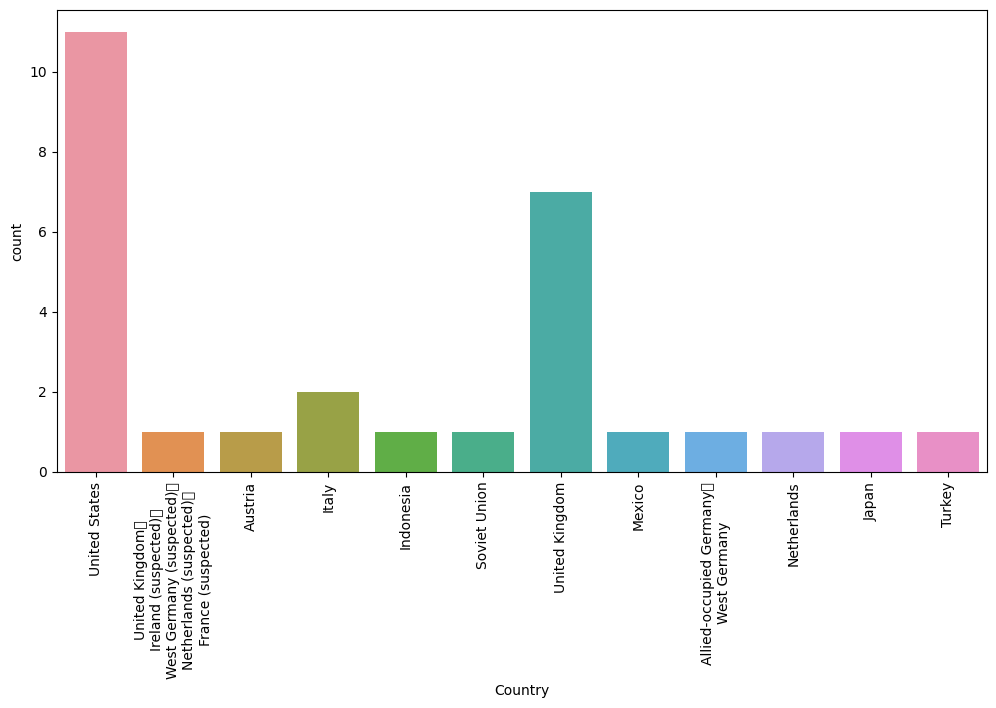

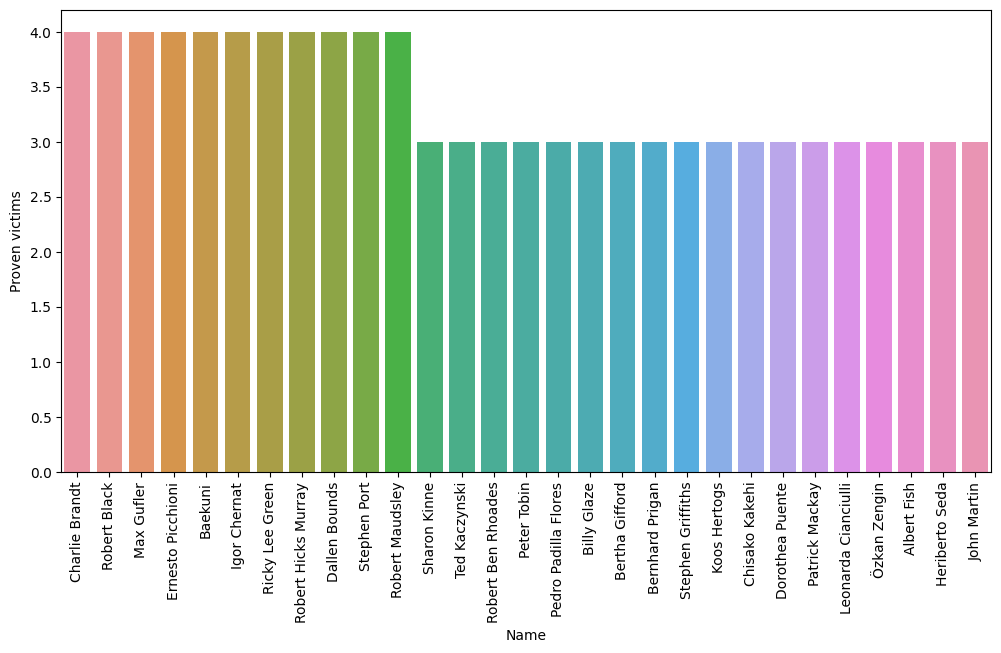

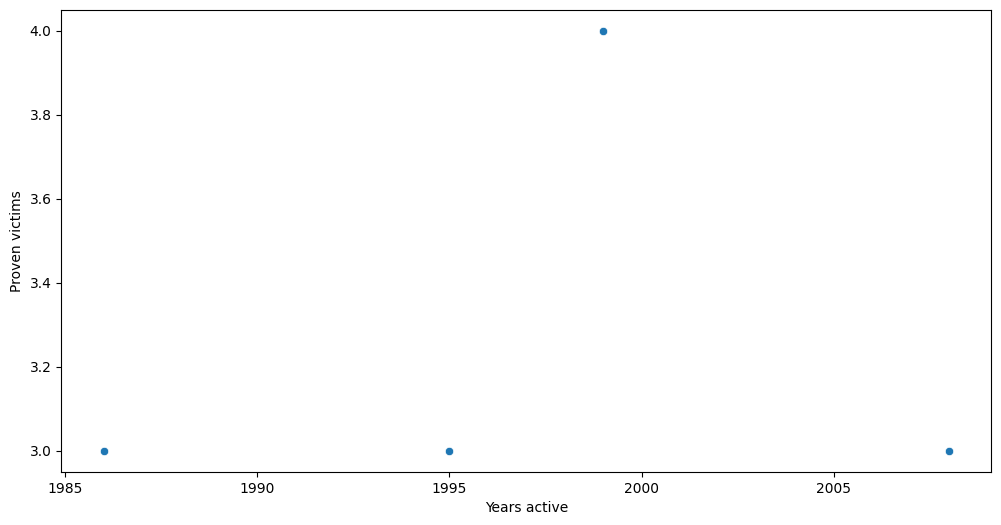

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


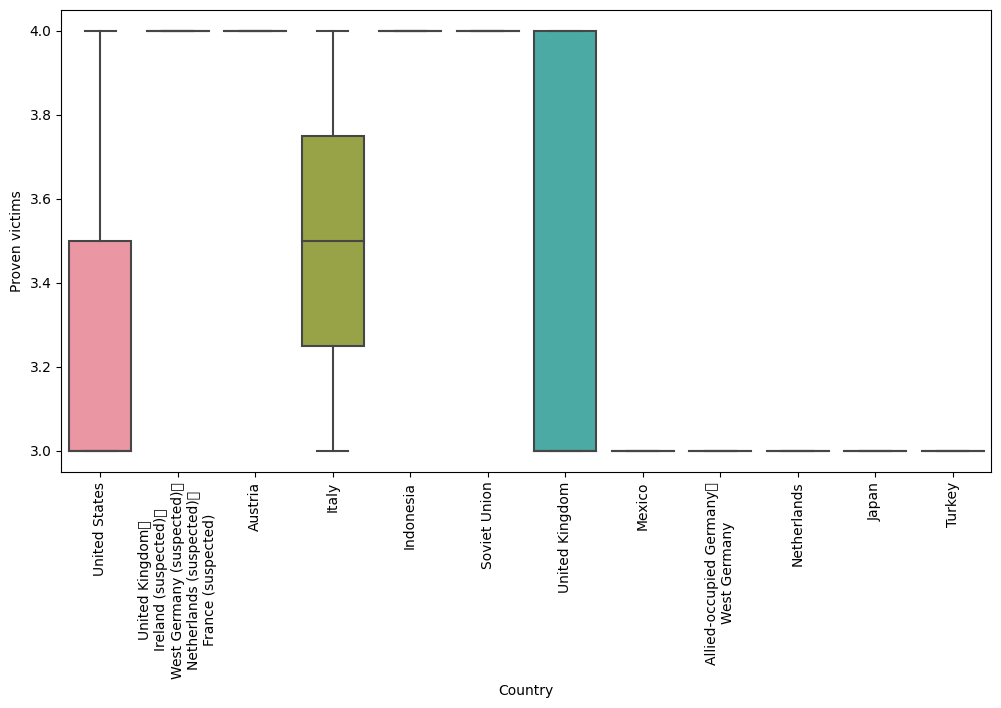

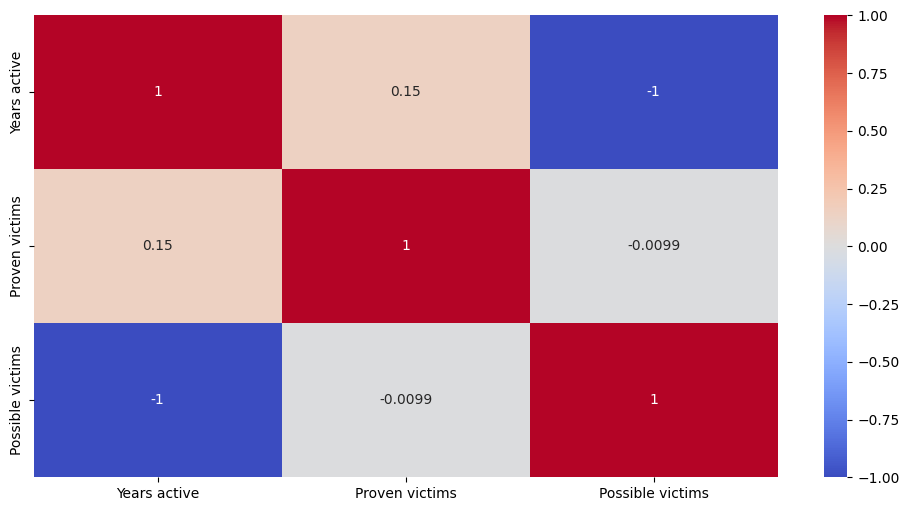

In [13]:
quick_plots(least_vic)

---

In [14]:
sk_data1_folder = "/Users/nacosta/Documents/research_topic/sk_data1"
sk_data1_files  = glob.glob(sk_data1_folder+"/*.csv")

In [15]:
least_vic_df = pd.read_csv(sk_data1_files[0])
mid2_vic_df = pd.read_csv(sk_data1_files[1])
highest_vic_df = pd.read_csv(sk_data1_files[2])
mid1_vic_df = pd.read_csv(sk_data1_files[3])


In [16]:
least_vic_df.sample(1)

,Name,Country,Years active,Proven victims,Possible victims,Notes
8,Dallen Bounds,United States,1999,4,4+,"Murdered a Radio Shack manager, and a florist at their respective places of business. Then murdered two acquaintances before taking two others hostage and committing suicide. Suspected of additional murders in the Pacific Northwest."


In [17]:
least_vic_df['Notes'].sample(5)

21                                                                 Poisoned her husband and two other men to death, but suspected in another seven deaths; sentenced to death.
14    Scottish rapist and serial killer known to have killed at least three young women. Also a suspect in the Bible John murders, committed in Glasgow during the late 1960s.
5                      Known as the "Evil Spirit of Kaukjarvi"; Ukrainian soldier who raped and killed women in Kamenka, selling their stolen items afterwards; executed 1987.
23                 Burglar suspect of 12 violent murders during robberies, charged with five and convicted of three. Bragged that he had killed 11 people. In prison for life.
25                                               Slit the throats of three confirmed victims before dumping the bodies in wells. Reportedly confessed to an additional murder.
Name: Notes, dtype: object

In [18]:
!pip install nltk

## Data Preparation  
### Exploratory Data Analysis (EDA)  
  
Tokenization: Split each text into words(tokens)  
Numericalization: Convert each word(token) into a number  

In [19]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


In [35]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
# Assuming you have a DataFrame called df with a column 'Notes'

# Convert text to lowercase
df['Notes'] = df['Notes'].str.lower()

# Remove punctuation marks
df['Notes'] = df['Notes'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Tokenization
df['Notes'] = df['Notes'].apply(word_tokenize)

# Remove stopwords
# Define custom stopwords
custom_stopwords = ['murdered', 'killed', 'murder', 'victims', 'sentenc', 'kill']
# Combine custom stopwords with NLTK stopwords
stopwords = set(stopwords.words('english') + custom_stopwords)
df['Notes'] = df['Notes'].apply(lambda x: [word for word in x if word not in stopwords])

# Remove numbers
df['Notes'] = df['Notes'].apply(lambda x: [word for word in x if not word.isdigit()])

# Stemming (optional)
stemmer = PorterStemmer()
df['Notes'] = df['Notes'].apply(lambda x: [stemmer.stem(word) for word in x])

# Remove short words
df['Notes'] = df['Notes'].apply(lambda x: [word for word in x if len(word) > 2])

# Clean up extra whitespace
df['Notes'] = df['Notes'].apply(lambda x: ' '.join(x))

# Print the preprocessed text
# print(df['Notes'])


[nltk_data] Downloading package punkt to /Users/nacosta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
def plot_frequency_analysis(df, freq_ct=10):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Word', data=df.head(freq_ct))
    plt.title(f'Top {freq_ct} Words Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

def frequency_analysis(df, freq_ct=10):
    from collections import Counter
    notes = df['Notes']

    # combine all texts together
    all_text = ' '.join(notes)
    words = all_text.split() # tokenize
    word_counts = Counter(words)
    word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency'])
    word_counts_df = word_counts_df.reset_index().rename(columns={'index': 'Word'})
    word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

    plot_frequency_analysis(word_counts_df, freq_ct)



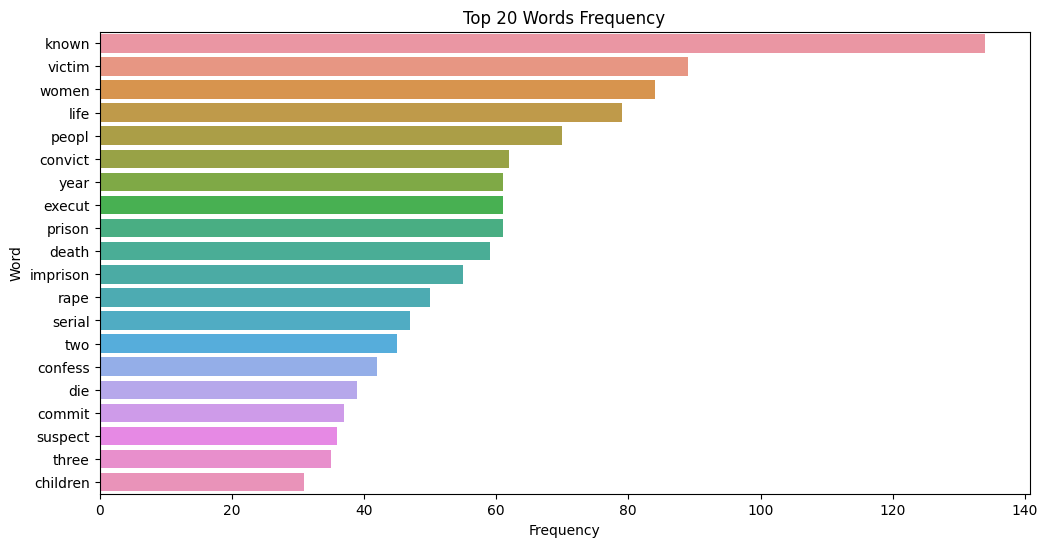

In [38]:
frequency_analysis(df, freq_ct=20)

## Sentient Analysis

#### In this example, we use the `SentimentIntensityAnalyzer` from NLTK to assign sentiment scores to each note in the "Notes" column. The sentiment scores are represented by the 'compound' value, which provides an overall sentiment polarity score ranging from -1 (most negative) to 1 (most positive). The sentiment scores are then stored in a new column called 'Sentiment'.



In [40]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
# Assuming you have a DataFrame called df with a column 'Notes'

# Instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each note and store the results in a new column
df['Sentiment'] = df['Notes'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Print the DataFrame with the sentiment scores
print(df[['Notes', 'Sentiment']])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nacosta/nltk_data...


                                                                                                                                                                                                                                                                                                                                                                                           Notes   
0    commit suicid hang wife niec latter also decapit evisc manner strongli similar unsolv women florida start year brandt move state brandt later consid culprit one due strong resembl suspect film traffic camera near place one bodi found could offici tie crime due lack evid previou year old attempt whole famili gun appar reason mother pregnant die attack father surviv sister escap  \
1                                                                                                                                                                                                                               

In [41]:
# Group the data by sentiment categories
sentiment_counts = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral').value_counts()

# Print the sentiment distribution
print(sentiment_counts)

Sentiment
Negative    229
Neutral      55
Positive     21
Name: count, dtype: int64
